

## Forecast the CocaCola prices data set. Prepare a document for each model explaining  how many dummy variables you have created and RMSE value for each model. Finally which model you will use for  Forecasting.

### CocaCola prices 

#### Libraries 

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing
from statsmodels.tsa.holtwinters import Holt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#### DataSet

In [24]:
cocacola=pd.read_excel("CocaCola_Sales_Rawdata.xlsx")
cocacola

,Quarter,Sales
0,Q1_86,1734.827000
1,Q2_86,2244.960999
2,Q3_86,2533.804993
3,Q4_86,2154.962997
4,Q1_87,1547.818996
5,Q2_87,2104.411995
6,Q3_87,2014.362999
7,Q4_87,1991.746998
8,Q1_88,1869.049999
9,Q2_88,2313.631996


### EDA 

In [25]:
cocacola.shape

(42, 2)

In [26]:
cocacola.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42 entries, 0 to 41
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Quarter  42 non-null     object 
 1   Sales    42 non-null     float64
dtypes: float64(1), object(1)
memory usage: 800.0+ bytes


In [27]:
cocacola.isnull().sum()

Quarter    0
Sales      0
dtype: int64

In [28]:
cocacola[cocacola.duplicated()]

,Quarter,Sales


In [29]:
quarter=['Q1','Q2','Q3','Q4']
n=cocacola['Quarter'][0]
n[0:2]

cocacola['quarter']=0

In [30]:
for i in range(42):
    n=cocacola['Quarter'][i]
    cocacola['quarter'][i]=n[0:2]

C:\Users\shash\AppData\Local\Temp\ipykernel_10940\3180776189.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cocacola['quarter'][i]=n[0:2]


In [31]:
dummy=pd.DataFrame(pd.get_dummies(cocacola['quarter']))
cocacola

,Quarter,Sales,quarter
0,Q1_86,1734.827000,Q1
1,Q2_86,2244.960999,Q2
2,Q3_86,2533.804993,Q3
3,Q4_86,2154.962997,Q4
4,Q1_87,1547.818996,Q1
5,Q2_87,2104.411995,Q2
6,Q3_87,2014.362999,Q3
7,Q4_87,1991.746998,Q4
8,Q1_88,1869.049999,Q1
9,Q2_88,2313.631996,Q2


In [34]:
pd.crosstab(index=cocacola["Sales"],columns=cocacola["quarter"])

quarter,Q1,Q2,Q3,Q4
Sales,,,,
1547.818996,1,0,0,0
1734.827000,1,0,0,0
1869.049999,1,0,0,0
1910.603996,1,0,0,0
1991.746998,0,0,0,1
2014.362999,0,0,1,0
2026.828999,0,0,0,1
2104.411995,0,1,0,0
2128.320000,0,0,1,0


<AxesSubplot:xlabel='quarter', ylabel='Sales'>

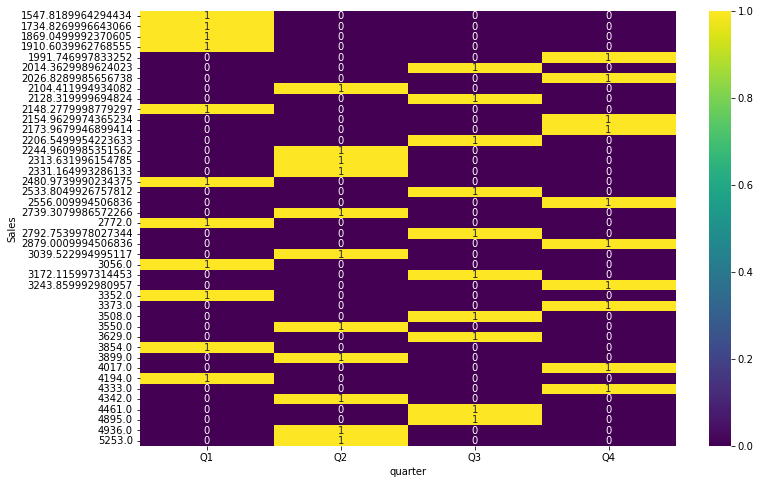

In [35]:
plt.figure(figsize=(12,8))
sns.heatmap(pd.crosstab(index=cocacola["Sales"],columns=cocacola["quarter"]),annot=True,cmap="viridis")

<AxesSubplot:>

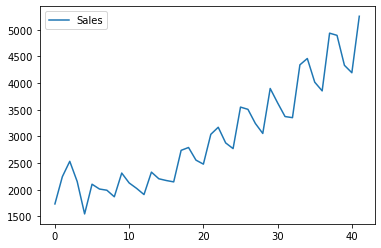

In [6]:
cocacola.plot()

### Splitting the data 

In [41]:
train=cocacola.head(37)
test=cocacola.tail(5)

### Moving Average 

<Figure size 864x288 with 0 Axes>

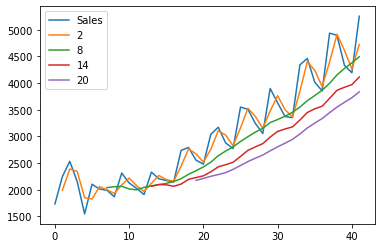

In [38]:
plt.figure(figsize=(12,4))
cocacola.plot(label="org")
for i in range(2,24,6):
    cocacola["Sales"].rolling(i).mean().plot(label=str(i))
plt.legend(loc='best')

C:\Users\shash\anaconda3\lib\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


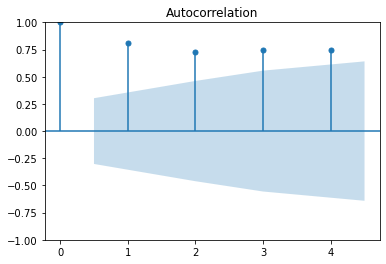

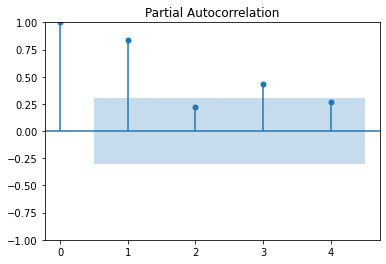

In [43]:
import statsmodels.graphics.tsaplots as tsa_plots
tsa_plots.plot_acf(cocacola.Sales,lags=4)
tsa_plots.plot_pacf(cocacola.Sales,lags=4)
plt.show()

### Evaluation Metric MAPE 

In [ ]:
def MAPE(pred,org):
    sales = np.abs((pred-org)/org)*100
    return np.mean(sales)

### Simple Exponential Method 

In [46]:
ses_model = SimpleExpSmoothing(train["Sales"]).fit(smoothing_level=0.2)
pred_ses = ses_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_ses,test.Sales) 

19.127275422738034

### Holt Method 

In [47]:
hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)
pred_hw = hw_model.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hw,test.Sales) 

C:\Users\shash\AppData\Local\Temp\ipykernel_10940\1267856404.py:1: FutureWarning: the 'smoothing_slope'' keyword is deprecated, use 'smoothing_trend' instead.
  hw_model = Holt(train["Sales"]).fit(smoothing_level=0.8, smoothing_slope=0.2)


14.286062850814272

### Holts winter exponential smoothing with additive seasonality and additive trend 

In [48]:
hwe_model_add_add = ExponentialSmoothing(train["Sales"],seasonal="add",trend="add",seasonal_periods=4).fit() #add the trend to the model
pred_hwe_add_add = hwe_model_add_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_add_add,test.Sales) 

4.190048325078623

### Holts winter exponential smoothing with multiplicative seasonality and additive trend 

In [50]:
hwe_model_mul_add = ExponentialSmoothing(train["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit() 
pred_hwe_mul_add = hwe_model_mul_add.predict(start = test.index[0],end = test.index[-1])
MAPE(pred_hwe_mul_add,test.Sales)

1.8702224327102304

### Final Model by combining train and test

In [51]:
hwe_model_add_add = ExponentialSmoothing(cocacola["Sales"],seasonal="mul",trend="add",seasonal_periods=4).fit()

In [53]:
##Forecasting for next 10 sales
hwe_model_add_add.forecast(10)

42    5210.523237
43    4772.600600
44    4517.616864
45    5694.128928
46    5628.160583
47    5147.622526
48    4865.763475
49    6124.648114
50    6045.797928
51    5522.644451
dtype: float64

In [54]:
data=pd.read_excel("Airlines+Data.xlsx")
data.head()

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
